# Import Libraries

In [235]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import networkx as nx

import random
random.seed(1)

# Convert Records of Tags into sentences

In [236]:
sentences = []
temp_tokens = []

def convert_tags_to_sentences():
    global sentences
    global temp_tokens
    fp  = open('tags.txt')
    lines = fp.readlines()
    for line in lines:    # Convert tags in each line into a sentences
        temp_tokens = line.strip().split(",")
        sentences.append(temp_tokens)
        

In [237]:
convert_tags_to_sentences()

# Train Word2Vec on sentences

In [256]:
from gensim.models import Word2Vec

model_1  = Word2Vec(sentences,min_count=2,size=150,window=4,workers=1)

print(model_1)

Word2Vec(vocab=528, size=150, alpha=0.025)


In [264]:

model_2 = Word2Vec(sentences,min_count=2,size=100,window=4,workers=1)

print(model_2)

Word2Vec(vocab=528, size=100, alpha=0.025)


In [265]:

model_3 = Word2Vec(sentences,min_count=2,size=170,window=4,workers=1)

print(model_3)

Word2Vec(vocab=528, size=170, alpha=0.025)


# Save and Load the models

In [266]:
model_1.save('model_1.bin')
model_2.save('model_2.bin')
model_3.save('model_3.bin')

In [267]:
model_1 = Word2Vec.load('model_1.bin')
model_2 = Word2Vec.load('model_2.bin')
model_3 = Word2Vec.load('model_3.bin')

In [272]:
words = list(model_1.wv.vocab)
print(words)

['math', 'mathematics', 'data', 'machine-learning-model', 'machine-learning', 'statistics', 'unsupervised-learning', 'books', 'orange', 'lda', 'deep-learning', 'keras', 'tensorflow', 'similarity', 'distance', 'features', 'dataset', 'version-control', 'lstm', 'python', 'classification', 'nlp', 'r', 'regression', 'correlation', 'reinforcement-learning', 'markov-process', 'data-cleaning', 'data-leakage', 'data-science-model', 'computer-vision', 'opencv', 'overfitting', 'bert', 'huggingface', 'feature-engineering', 'neural-network', 'regularization', 'time-series', 'pandas', 'dataframe', 'normalization', 'linear-regression', 'descriptive-statistics', 'interpretation', 'data-mining', 'association-rules', 'multilabel-classification', 'autoencoder', 'interpolation', 'pytorch', 'scikit-learn', 'derivation', 'recommender-system', 'gradient-descent', 'python-3.x', 'image', 'tableau', 'algorithms', 'pyspark', 'cnn', 'convolution', 'dropout', 'text-mining', 'accuracy', 'feature-selection', 'catego

In [273]:
sample_word = 'machine-learning'

print("Length of Vectors in the Model : ",len(model_1[sample_word]))
print("Vectors in Model 1 :",model_1[sample_word])


Length of Vectors in the Model :  150
Vectors in Model 1 : [ 0.08486344 -0.35455036 -0.28926367 -0.02916209 -0.08953681 -0.2075892
 -0.16333818 -0.18575811  0.20739695  0.03712852  0.06914465  0.14064768
  0.12821205 -0.0386684  -0.01227538 -0.24857403 -0.03224508 -0.03999469
 -0.0433288   0.00085005 -0.13735718 -0.17239025 -0.15186557  0.02172565
  0.05422632  0.02491073  0.02298221  0.215271    0.00458999  0.0134119
 -0.12836775  0.00746642 -0.26022938  0.06663544  0.03049868  0.12933484
  0.2683739  -0.08822308  0.15165259  0.00598263 -0.04291629 -0.09051707
  0.12228443  0.04699631 -0.09179221  0.16843966 -0.05864123 -0.06565411
  0.1086153   0.10510766  0.03663891  0.03224663  0.15354256 -0.08383948
 -0.00809012 -0.15752833  0.11829754  0.1058339  -0.16367906 -0.02995556
  0.11717194  0.0389033   0.00203742  0.06100055 -0.0621063  -0.12472665
 -0.00208093  0.0974755  -0.05069591 -0.07236721  0.13962     0.02234389
  0.1649915  -0.05892437  0.1494882   0.0295715  -0.03891684  0.151

C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [274]:
from gensim.similarities.index import AnnoyIndexer

def query_similar_tags(query,model,name):
    
    annoy_index = AnnoyIndexer(model,100)
    
    #Retrieve the vector for the query tags
    query_vec = model[query]
    
    #Find the Top 25 most similar vectors 
    neighbours = model.wv.most_similar([query_vec],topn=25,indexer=annoy_index)
    
    print("Model : " ,name)
    return neighbours
        

### Results for sample queries

In [275]:
query_similar_tags('nlp',model_1,'model_1')

Model :  model_1


C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('nlp', 0.9997009900107514),
 ('natural-language-process', 0.9890585225075483),
 ('text-mining', 0.9886415554210544),
 ('word2vec', 0.9881422026082873),
 ('text-classification', 0.9880333729088306),
 ('transformer', 0.9879144225269556),
 ('prediction', 0.9876352958381176),
 ('text', 0.9875835832208395),
 ('named-entity-recognition', 0.9874190576374531),
 ('graphs', 0.9874060349538922),
 ('language-model', 0.9873717678710818),
 ('lda', 0.98735879547894),
 ('gensim', 0.9872122975066304),
 ('tfidf', 0.9871797114610672),
 ('embeddings', 0.9871530067175627),
 ('nltk', 0.9871251992881298),
 ('topic-model', 0.9871170995756984),
 ('recommender-system', 0.9870409863069654),
 ('similarity', 0.9870340870693326),
 ('supervised-learning', 0.986976751126349),
 ('attention-mechanism', 0.9869607426226139),
 ('gpu', 0.9869333440437913),
 ('sentiment-analysis', 0.986910555511713),
 ('text-generation', 0.9868322405964136),
 ('bert', 0.9868243206292391)]

In [276]:
query_similar_tags('deep-learning',model_1,'model_1')

Model :  model_1


C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('deep-learning', 1.0),
 ('cnn', 0.9855543822050095),
 ('keras', 0.9852764774113894),
 ('neural-network', 0.9851796375587583),
 ('convolution', 0.984582370147109),
 ('image-classification', 0.9844112806022167),
 ('pytorch', 0.9840970896184444),
 ('computer-vision', 0.9840027336031199),
 ('object-detection', 0.983753178268671),
 ('convnet', 0.9837394263595343),
 ('image-recognition', 0.9836671911180019),
 ('training', 0.9831534121185541),
 ('gpu', 0.9830037076026201),
 ('transfer-learning', 0.9827556498348713),
 ('image-preprocessing', 0.9827064648270607),
 ('lstm', 0.9827030207961798),
 ('rnn', 0.9826840776950121),
 ('recurrent-neural-net', 0.9826746117323637),
 ('tensorflow', 0.9826179426163435),
 ('loss-function', 0.9825486410409212),
 ('optimization', 0.9824201799929142),
 ('transformer', 0.9823922291398048),
 ('backpropagation', 0.982373621314764),
 ('autoencoder', 0.9822053462266922),
 ('gan', 0.9817399773746729)]

In [277]:
query_similar_tags('nltk',model_1,'model_1')

Model :  model_1


C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[('nltk', 1.0),
 ('information-retrieval', 0.9877138808369637),
 ('text-classification', 0.9874439546838403),
 ('text', 0.9872391270473599),
 ('similarity', 0.9871483677998185),
 ('nlp', 0.9871275136247277),
 ('bigdata', 0.9870180087164044),
 ('natural-language-process', 0.98685715906322),
 ('tfidf', 0.9868333730846643),
 ('text-mining', 0.9868254512548447),
 ('recommender-system', 0.9868220612406731),
 ('prediction', 0.9867611387744546),
 ('named-entity-recognition', 0.9867262933403254),
 ('pytorch', 0.9866133881732821),
 ('smote', 0.986526845023036),
 ('r', 0.986417792737484),
 ('ocr', 0.9863903922960162),
 ('binary', 0.9863226776942611),
 ('jupyter', 0.9863194096833467),
 ('graphs', 0.9863172322511673),
 ('embeddings', 0.9863019939512014),
 ('gaussian', 0.9862650567665696),
 ('encoding', 0.9862542124465108),
 ('math', 0.9862455409020185),
 ('language-model', 0.98618608340621)]

# Dimensionality reduction - PCA

### Retrieve vectors from the four models

In [278]:
X1 = model_1[model_1.wv.vocab]

C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### Fit a PCA model

In [279]:
#Instantiate a PCA model
pca = PCA(n_components=2)

#Fit the vectors
model_1_res = pca.fit_transform(X1)

### Visualizing the projections

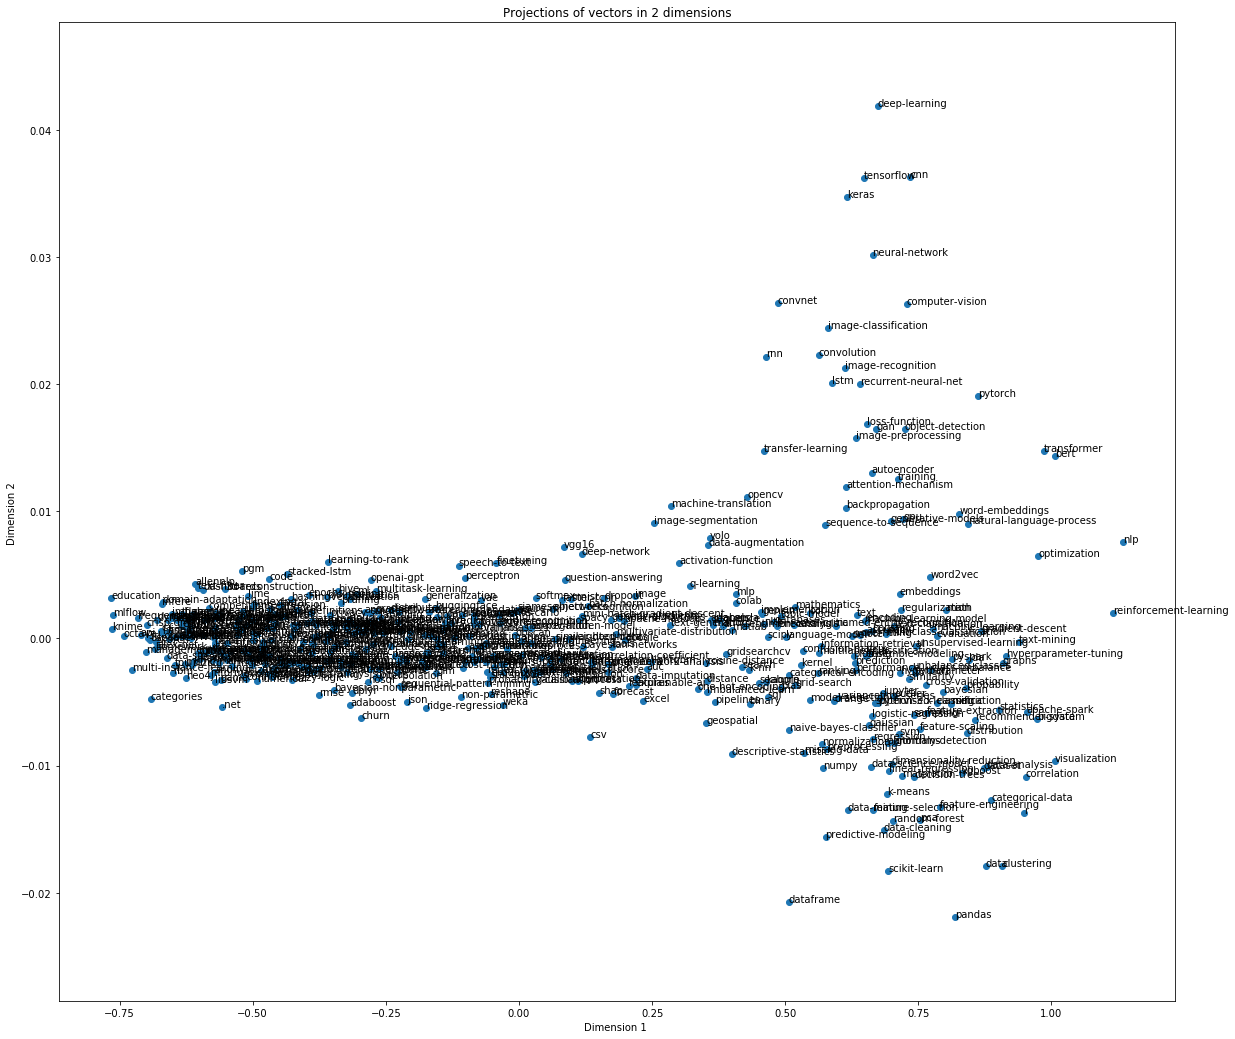

In [280]:
#Model 1 


plt.figure(figsize=(20,18))

plt.scatter(model_1_res[:,0],model_1_res[:,1])
words_1 = list(model_1.wv.vocab)

#Annotate vectors with their appropriate tags/words
for i, word in enumerate(words_1):
    plt.annotate(word, xy=(model_1_res[i, 0], model_1_res[i, 1]))
    
plt.xlabel('Dimension 1 ')
plt.ylabel('Dimension 2 ')
plt.title('Projections of vectors in 2 dimensions')
plt.show()


# Comparison of results with Weighted-graph approach

In [281]:
def compare(query,model,name):
    #Load the graph
    G = nx.read_gpickle('tags_graph.pickle')
    #Read the neighbours of the query node
    edges_of_query = G[query]
    neighbours_graph = sorted(edges_of_query.items(), key=lambda edge: edge[1]['weight'],reverse=True)
    neighbours_graph = neighbours_graph[:26]
    
    #Extract Neighbouring vectors from embeddings
    neighbours_w2v = query_similar_tags(query,model,name)
    
    #Compare the Top 25 results of both the approaches
    print("Graph                                    Word-Embeddings")
    for i in range(0,25):
        print(neighbours_graph[i],"          ",neighbours_w2v[i])
        
    #Extract only the keys from (key,value) tuples
    key_tags_graph = [neighbour[0] for neighbour in neighbours_graph]
    key_tags_w2v   = [neighbour[0] for neighbour in neighbours_w2v]
    
    print("\n")
        
    print("Intersection in results : ")
    print(set(key_tags_graph).intersection(set(key_tags_w2v)))

In [282]:
compare('machine-learning',model_1,'model_1')

C:\Users\91887\Anaconda3\lib\site-packages\gensim\similarities\index.py:198: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  index = AnnoyIndex(num_features)


Model :  model_1
Graph                                    Word-Embeddings
('python', {'weight': 540})            ('machine-learning', 1.0)
('deep-learning', {'weight': 534})            ('metric', 0.988405249081552)
('neural-network', {'weight': 423})            ('recommender-system', 0.9883859874680638)
('classification', {'weight': 286})            ('feature-extraction', 0.9880945459008217)
('scikit-learn', {'weight': 218})            ('sampling', 0.9879762288182974)
('keras', {'weight': 203})            ('ensemble-modeling', 0.9879749901592731)
('regression', {'weight': 152})            ('correlation', 0.9879737515002489)
('tensorflow', {'weight': 147})            ('bayesian', 0.9877017559483647)
('nlp', {'weight': 147})            ('evaluation', 0.9876957004889846)
('time-series', {'weight': 142})            ('statistics', 0.9876775480806828)
('predictive-modeling', {'weight': 134})            ('boosting', 0.9876136230304837)
('cnn', {'weight': 130})            ('gaussian', 0.987601

C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [283]:
compare('machine-learning',model_2,'model_2')

Model :  model_2
Graph                                    Word-Embeddings
('python', {'weight': 540})            ('machine-learning', 1.0)
('deep-learning', {'weight': 534})            ('metric', 0.9862206457182765)
('neural-network', {'weight': 423})            ('recommender-system', 0.9861526852473617)
('classification', {'weight': 286})            ('evaluation', 0.9857496302574873)
('scikit-learn', {'weight': 218})            ('ensemble-modeling', 0.9856714187189937)
('keras', {'weight': 203})            ('model-selection', 0.9856464825570583)
('regression', {'weight': 152})            ('feature-extraction', 0.9855905314907432)
('tensorflow', {'weight': 147})            ('ranking', 0.9854638921096921)
('nlp', {'weight': 147})            ('sampling', 0.9854362392798066)
('time-series', {'weight': 142})            ('boosting', 0.9854117026552558)
('predictive-modeling', {'weight': 134})            ('bayesian', 0.9852724308148026)
('cnn', {'weight': 130})            ('dqn', 0.985190703

C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [284]:
compare('machine-learning',model_3,'model_3')

Model :  model_3
Graph                                    Word-Embeddings
('python', {'weight': 540})            ('machine-learning', 1.0)
('deep-learning', {'weight': 534})            ('metric', 0.9892010893672705)
('neural-network', {'weight': 423})            ('recommender-system', 0.9890163848176599)
('classification', {'weight': 286})            ('feature-extraction', 0.9888387406244874)
('scikit-learn', {'weight': 218})            ('sampling', 0.9887947691604495)
('keras', {'weight': 203})            ('correlation', 0.988650742918253)
('regression', {'weight': 152})            ('evaluation', 0.9886402450501919)
('tensorflow', {'weight': 147})            ('ensemble-modeling', 0.9886153489351273)
('nlp', {'weight': 147})            ('bigdata', 0.9885774534195662)
('time-series', {'weight': 142})            ('math', 0.9884335556998849)
('predictive-modeling', {'weight': 134})            ('bayesian', 0.9883603537455201)
('cnn', {'weight': 130})            ('python-3.x', 0.98826854117

C:\Users\91887\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
